In [2]:
import pickle
with open('/nas/xd/projects/transformers/notebooks/lxy/task_accuary_davinci_tem0.pickle', 'rb') as file:   #用with的优点是可以不用写关闭文件操作
    dict_davinci = pickle.load(file)

In [3]:
dict_davinci['MlM_gen[genders_of_persons.TreeSet.equal,types_of_things.TreeSet.equal][cxt_len=3,rev_item2str]']

{'texts': ("The bread is  Ruth's. The cake is Paul's. The pizza is Richard's. Paul likes cake\nThe violin is George's. The rabbit is Mary's. The costume is Ruth's. Ruth likes costume\nThe blueberries are Sandra's. The shotgun is Kenneth's. The pear is Paul's. Paul likes pear\nThe pig is George's. The phone is Betty's. The yellow is Linda's. Linda likes yellow\nThe juice is Steven's. The apple is Maria's. The burger is Jennifer's. Jennifer likes burger\nThe grapes is Sandra's. The shoes are Joseph's. The squirrel is Jason's. Joseph likes shoes\nThe mosquito is Sharon's. The sheep is George's. The pistol is Thomas's. George likes sheep\nThe mango is John's. The beetle is George's. The pants is Paul's. George likes beetle\nThe donkey is Susan's. The pizza is Carol's. The jeans is Sarah's. Susan likes donkey\nThe burger is Dorothy's. The strawberries is Ruth's. The lime is Joseph's. Joseph likes lime\nThe bus is Deborah's. The pink is Ronald's. The goose is Michelle's. Michelle likes goose

In [24]:
keys = list(dicts['task_accuary_llama_7B_0329'].keys())
for key in keys:
    print(dicts['task_accuary_llama_7B_0329'][key])
    print(dicts['task_accuary_llama_7B_space_0329'][key])
    print('=============')

{'texts': ('Ruth has bread. Paul has cake. Richard has pizza. Paul likes cake\nGeorge has violin. Mary has rabbit. Ruth has costume. Ruth likes costume\nSandra has blueberries. Kenneth has shotgun. Paul has pear. Paul likes pear\nGeorge has pig. Betty has phone. Linda has yellow. Linda likes yellow\nSteven has juice. Maria has apple. Jennifer has burger. Jennifer likes burger\nSandra has grapes. Joseph has shoes. Jason has squirrel. Joseph likes shoes\nSharon has mosquito. George has sheep. Thomas has pistol. George likes sheep\nJohn has mango. George has beetle. Paul has pants. George likes beetle\nSusan has donkey. Carol has pizza. Sarah has jeans. Susan likes donkey\nDorothy has burger. Ruth has strawberries. Joseph has lime. Joseph likes lime\nDeborah has bus. Ronald has pink. Michelle has goose. Michelle likes goose\nLaura has deer. Joseph has blueberries. Nancy has goat. Laura likes deer\n',), 'mean_loss': 0.9413772784173489, 'mean_acc': 0.5833333333333334, 'answer_probs': array(

In [22]:
dicts['task_accuary_llama_7B_0329']['MlM_gen[genders_of_persons.TreeSet.equal,types_of_things.TreeSet.equal][cxt_len=3]']

{'texts': ('Ruth has bread. Paul has cake. Richard has pizza. Paul likes cake\nGeorge has violin. Mary has rabbit. Ruth has costume. Ruth likes costume\nSandra has blueberries. Kenneth has shotgun. Paul has pear. Paul likes pear\nGeorge has pig. Betty has phone. Linda has yellow. Linda likes yellow\nSteven has juice. Maria has apple. Jennifer has burger. Jennifer likes burger\nSandra has grapes. Joseph has shoes. Jason has squirrel. Joseph likes shoes\nSharon has mosquito. George has sheep. Thomas has pistol. George likes sheep\nJohn has mango. George has beetle. Paul has pants. George likes beetle\nSusan has donkey. Carol has pizza. Sarah has jeans. Susan likes donkey\nDorothy has burger. Ruth has strawberries. Joseph has lime. Joseph likes lime\nDeborah has bus. Ronald has pink. Michelle has goose. Michelle likes goose\nLaura has deer. Joseph has blueberries. Nancy has goat. Laura likes deer\n',),
 'mean_loss': 0.9413772784173489,
 'mean_acc': 0.5833333333333334,
 'answer_probs': arr

In [21]:
dicts['task_accuary_llama_7B_space_0329']['MlM_gen[genders_of_persons.TreeSet.equal,types_of_things.TreeSet.equal][cxt_len=3]']

{'texts': (' Ruth has bread. Paul has cake. Richard has pizza. Paul likes cake\n George has violin. Mary has rabbit. Ruth has costume. Ruth likes costume\n Sandra has blueberries. Kenneth has shotgun. Paul has pear. Paul likes pear\n George has pig. Betty has phone. Linda has yellow. Linda likes yellow\n Steven has juice. Maria has apple. Jennifer has burger. Jennifer likes burger\n Sandra has grapes. Joseph has shoes. Jason has squirrel. Joseph likes shoes\n Sharon has mosquito. George has sheep. Thomas has pistol. George likes sheep\n John has mango. George has beetle. Paul has pants. George likes beetle\n Susan has donkey. Carol has pizza. Sarah has jeans. Susan likes donkey\n Dorothy has burger. Ruth has strawberries. Joseph has lime. Joseph likes lime\n Deborah has bus. Ronald has pink. Michelle has goose. Michelle likes goose\n Laura has deer. Joseph has blueberries. Nancy has goat. Laura likes deer\n',),
 'mean_loss': 0.9557142220437527,
 'mean_acc': 0.5833333333333334,
 'answer

In [25]:
dicts ={}
model_names = ['task_accuary_gpt_neox','task_accuary_gptj','task_accuary_llama_7B','task_accuary_llama_7B_0329','task_accuary_llama_7B_space_0329','task_accuary_llama_13B_0329','task_accuary_davinci_tem0','task_accuary_text_davinci001','task_accuary_text_davinci002','task_accuary_text_davinci003']

for model_name in model_names:
    with open('/nas/xd/projects/transformers/notebooks/lxy/' + model_name + '.pickle', 'rb') as file:   #用with的优点是可以不用写关闭文件操作
        dict_tmp = pickle.load(file)
        dicts[model_name] = dict_tmp

In [26]:
import matplotlib.pyplot as plt

task_accuary_gpt_neox 0.46261820330969283


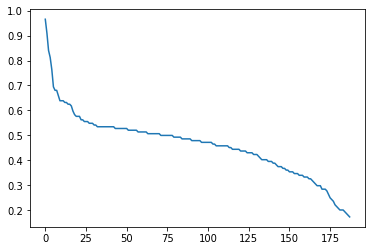

task_accuary_gptj 0.46317228132387683


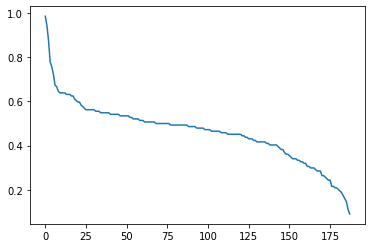

task_accuary_llama_7B 0.615211288416076


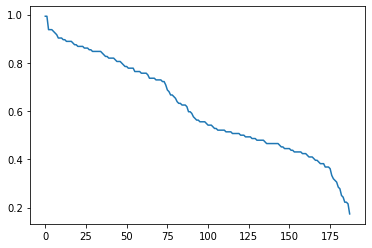

task_accuary_llama_7B_0329 0.46694001182033124


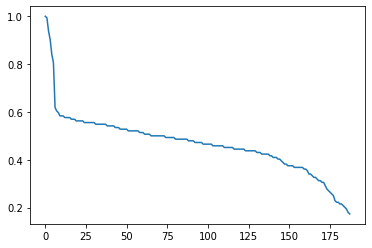

task_accuary_llama_7B_space_0329 0.4655732860520096


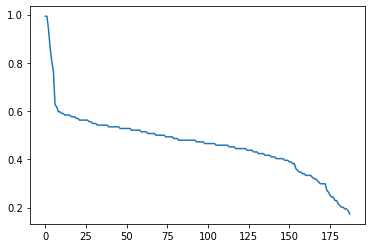

task_accuary_llama_13B_0329 0.4809027777777777


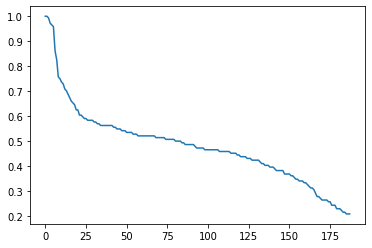

task_accuary_davinci_tem0 0.47429078014184367


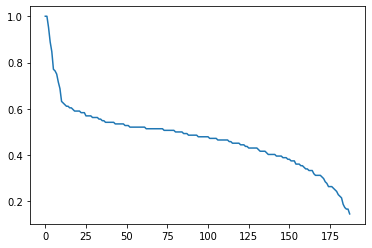

task_accuary_text_davinci001 0.4713356973995272


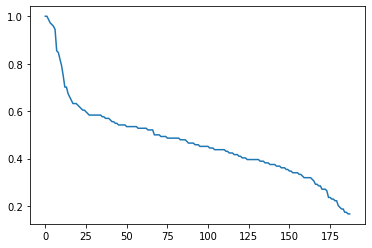

task_accuary_text_davinci002 0.6373374704491724


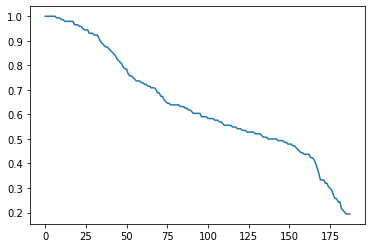

task_accuary_text_davinci003 0.6729831560283688


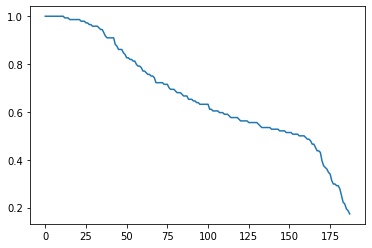

In [27]:
for key, value in dicts.items():
    accury = 0
    for task, desp in value.items():
        accury += desp['mean_acc']
    print(key, accury / len(value))
    desp = sorted(value.items(), key = lambda x: x[1]['mean_acc'], reverse = True)
    y = [line[1]['mean_acc'] for line in desp]
    plt.plot(range(len(y)), y)
    plt.show()